# Part B: Customer Churn Prediction

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [3]:
df = pd.read_excel("C:/Users/SRAVANI/Downloads/course/Machine Learning/Customer_data.xlsx")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# Exploratory Data Analysis

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [7]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [8]:
df.dropna(subset=['TotalCharges'], inplace=True)

In [9]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

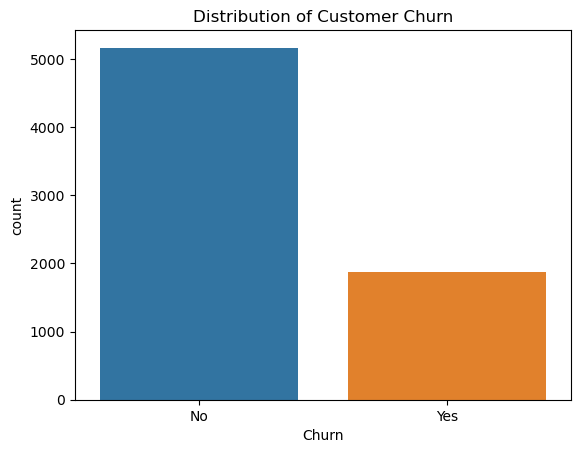

In [10]:
sns.countplot(x= 'Churn', data = df)
plt.title('Distribution of Customer Churn')
plt.show()

#### With the above visualization, we can say the dataset is imbalanced where two classes are not equally distributed.

In [12]:
print(df.columns)

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')


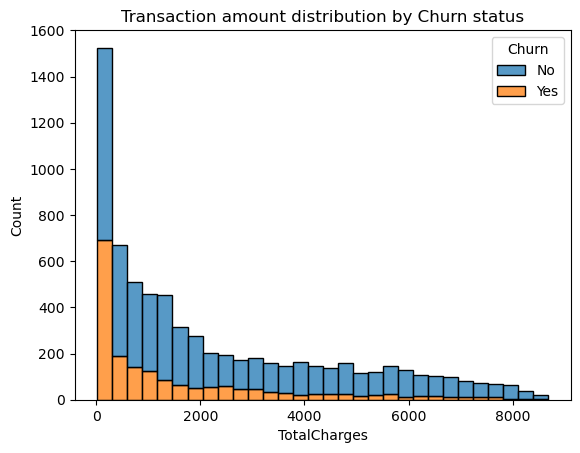

In [13]:
sns.histplot(data = df, x = 'TotalCharges', hue = 'Churn', multiple = 'stack', bins = 30)
plt.title('Transaction amount distribution by Churn status')
plt.show()

### In the above visualization, orange bars indicates the customers who left and paid less money.
### Customers who stayed and paid more money are indicated with blue bars.


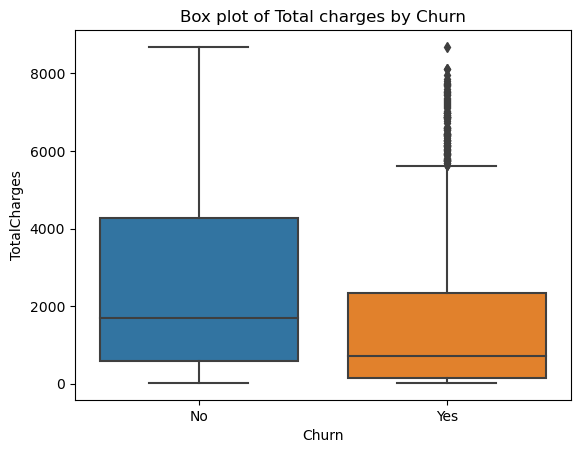

In [15]:
sns.boxplot(x = 'Churn', y = 'TotalCharges', data = df)
plt.title('Box plot of Total charges by Churn')
plt.show()


### Correlation matrix

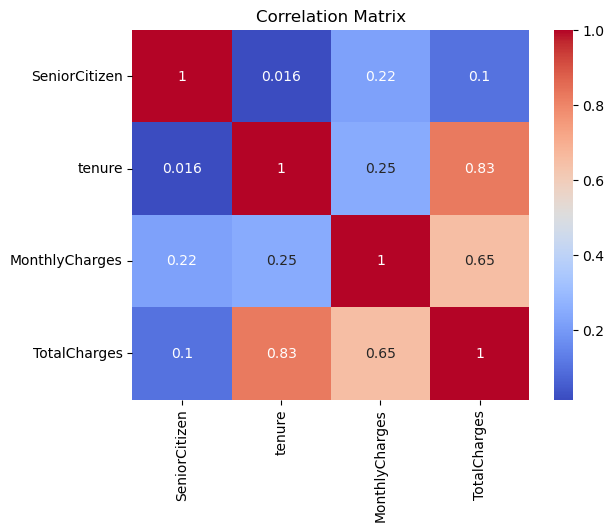

In [17]:
num_cols = list()
for column in df.columns:
    if df[column].dtype != object:
        num_cols.append(column)

correlation_matrix = df[num_cols].corr()
sns.heatmap(correlation_matrix, annot = True, cmap = 'coolwarm')
plt.title('Correlation Matrix')
plt.show()

#### There is a strong positive correlation between TotalCharges and Tenure. Which means the customers having high total charges will stay for long time.
#### Moderate correlation between TotalCharges and MonthlyCharges.
#### All other variables has weak correlation.

## Data Preprocessing

In [20]:
df.drop('customerID',axis=1, inplace=True, errors='ignore')

In [21]:
print(df.columns)

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')


In [22]:
label_encoders = {}
for column in ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod','Churn']:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

In [23]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


### Splitting training and testing data

In [25]:
x = df.drop(['Churn'], axis = 1)
y = df['Churn']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

In [26]:
scaler = StandardScaler()
x_train  =  scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# Logistic Regression

In [27]:
from sklearn.linear_model import LogisticRegression

logReg = LogisticRegression()
logReg.fit(x_train, y_train)
logReg_pred = logReg.predict(x_test)
logReg_accuracy = accuracy_score(y_test,logReg_pred)

In [28]:
print(f'Logistic Regression Accuracy: {logReg_accuracy*100:.2f}')
print('\n Logistic regression Classification report: ')
print(classification_report(y_test, logReg_pred))

Logistic Regression Accuracy: 79.91

 Logistic regression Classification report: 
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1555
           1       0.64      0.53      0.58       555

    accuracy                           0.80      2110
   macro avg       0.74      0.71      0.72      2110
weighted avg       0.79      0.80      0.79      2110



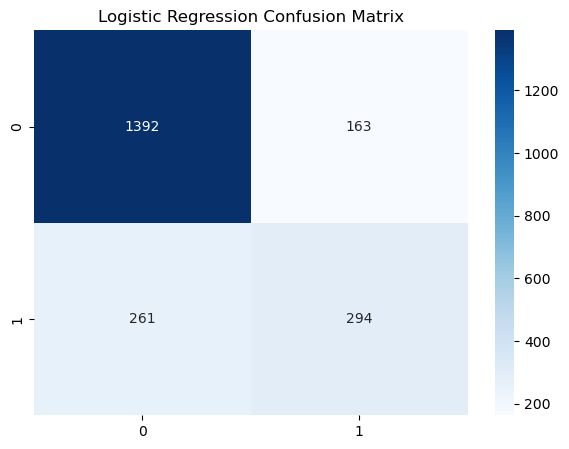

In [83]:
plt.figure(figsize = (7,5))
sns.heatmap(confusion_matrix(y_test, logReg_pred), annot = True, fmt = 'd', cmap = 'Blues')
plt.title("Logistic Regression Confusion Matrix")
plt.show()

# Decision Tree Algorithm

In [49]:
from sklearn.tree import DecisionTreeClassifier
# Decision Tree
decision_tree = DecisionTreeClassifier()
decision_tree.fit(x_train, y_train)
decision_tree_pred = decision_tree.predict(x_test)
decision_tree_accuracy = accuracy_score(y_test, decision_tree_pred)


In [51]:
print(f'Decision Tree Accuracy: {decision_tree_accuracy*100:.2f}')
print('\n Decision Tree Classification report: ')
print(classification_report(y_test, decision_tree_pred))

Decision Tree Accuracy: 72.42

 Decision Tree Classification report: 
              precision    recall  f1-score   support

           0       0.82      0.80      0.81      1555
           1       0.48      0.50      0.49       555

    accuracy                           0.72      2110
   macro avg       0.65      0.65      0.65      2110
weighted avg       0.73      0.72      0.73      2110



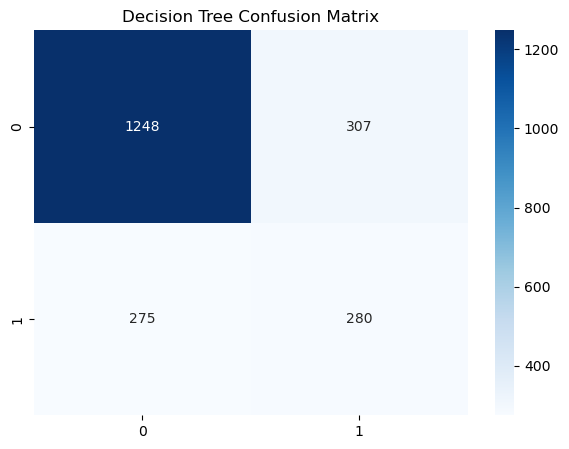

In [81]:
plt.figure(figsize = (7,5))
sns.heatmap(confusion_matrix(y_test, decision_tree_pred), annot = True, fmt = 'd', cmap = 'Blues')
plt.title("Decision Tree Confusion Matrix")
plt.show()

## Random Forest Algorithm

In [64]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators = 100, random_state = 42)
rf_model.fit(x_train, y_train)



RandomForestClassifier(random_state=42)

In [85]:
y_pred = rf_model.predict(x_test)

rf_accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {rf_accuracy * 100:.2f}%")
print('\nClassification report: ')
print(classification_report(y_test, y_pred))

Accuracy: 79.05%

Classification report: 
              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1555
           1       0.63      0.48      0.55       555

    accuracy                           0.79      2110
   macro avg       0.73      0.69      0.71      2110
weighted avg       0.78      0.79      0.78      2110



In [70]:
print('\nConfusion Matrix : ')
print(confusion_matrix(y_test, y_pred))


Confusion Matrix : 
[[1399  156]
 [ 286  269]]


# Support Vector Machine

In [75]:
from sklearn.svm import SVC

svm = SVC()
svm.fit(x_train, y_train)
svm_pred = svm.predict(x_test)
svm_accuracy = accuracy_score(y_test, svm_pred)


In [77]:
print(f"SVM Accuracy: {svm_accuracy * 100:.2f}%")
print('\nClassification report: ')
print(classification_report(y_test, svm_pred))

SVM Accuracy: 79.29%

Classification report: 
              precision    recall  f1-score   support

           0       0.82      0.92      0.87      1555
           1       0.65      0.45      0.53       555

    accuracy                           0.79      2110
   macro avg       0.74      0.68      0.70      2110
weighted avg       0.78      0.79      0.78      2110



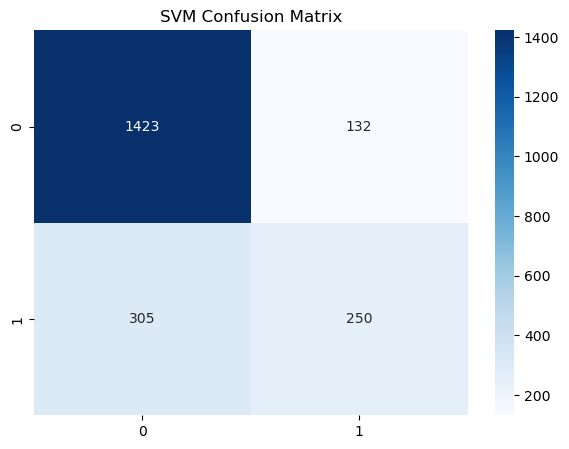

In [79]:
plt.figure(figsize = (7,5))
sns.heatmap(confusion_matrix(y_test, svm_pred), annot = True, fmt = 'd', cmap = 'Blues')
plt.title("SVM Confusion Matrix")
plt.show()

In [87]:
# Summary of accuracies
model_accuracies = {
    'Logistic Regression': logReg_accuracy,
    'Decision Tree': decision_tree_accuracy,
    'Random Forest': rf_accuracy,
    'Support Vector Machine': svm_accuracy
}

# Display accuracies
for model, accuracy in model_accuracies.items():
    print(f'{model} Accuracy: {accuracy*100:.2f} %')


Logistic Regression Accuracy: 79.91 %
Decision Tree Accuracy: 72.42 %
Random Forest Accuracy: 79.05 %
Support Vector Machine Accuracy: 79.29 %


# Hyperparameter Tuning

In [97]:
# Import necessary libraries
from sklearn.model_selection import GridSearchCV

# Logistic Regression Optimization 
logreg_param_grid = {
    'C': [0.1, 1, 10],                 # Regularization parameter
    'solver': ['liblinear', 'lbfgs'], # Solvers to use
    'max_iter': [100, 200, 300]       # Maximum number of iterations
}

logreg_grid_search = GridSearchCV(LogisticRegression(), logreg_param_grid, cv=5, scoring='accuracy')
logreg_grid_search.fit(x_train, y_train)

logreg_best_params = logreg_grid_search.best_params_
logreg_best_accuracy = logreg_grid_search.best_score_

logreg_best_params


{'C': 0.1, 'max_iter': 100, 'solver': 'liblinear'}

In [99]:
logreg_best_accuracy

0.8037371548842392

In [111]:
decision_tree_param_grid = {
    'max_depth': [3, 5, 10, None],            # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],          # Minimum samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],            # Minimum samples required to be at a leaf node
    'criterion': ['gini', 'entropy']          # Function to measure the quality of a split
}

decision_tree_grid_search = GridSearchCV(DecisionTreeClassifier(), decision_tree_param_grid, cv=5, scoring='accuracy')
decision_tree_grid_search.fit(x_train, y_train)

decision_tree_best_params = decision_tree_grid_search.best_params_
decision_tree_best_accuracy = decision_tree_grid_search.best_score_

decision_tree_best_params

{'criterion': 'gini',
 'max_depth': 5,
 'min_samples_leaf': 2,
 'min_samples_split': 2}

In [113]:
decision_tree_best_accuracy

0.7850482852544262

In [117]:
#  Random Forest Optimization 
rf_param_grid = {
    'n_estimators': [50, 100, 200],  # Number of trees in the forest
    'max_depth': [3, 5, 10, None],  # Maximum depth of each tree
    'min_samples_split': [2, 5, 10],  # Minimum samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]  # Minimum samples required to be at a leaf node
}

rf_grid_search = GridSearchCV(RandomForestClassifier(), rf_param_grid, cv=5, scoring='accuracy')
rf_grid_search.fit(x_train, y_train)
rf_best_params = rf_grid_search.best_params_
rf_best_accuracy = rf_grid_search.best_score_

rf_best_params

{'max_depth': 10,
 'min_samples_leaf': 1,
 'min_samples_split': 10,
 'n_estimators': 200}

In [119]:
rf_best_accuracy

0.8071916140481201

In [121]:
# Support Vector Machine Optimization 
svm_param_grid = {
    'C': [0.1, 1, 10],  # Regularization parameter
    'kernel': ['linear', 'rbf', 'poly'],  # Kernel type to be used
    'gamma': ['scale', 'auto']  # Kernel coefficient for 'rbf', 'poly' and 'sigmoid'
}

svm_grid_search = GridSearchCV(SVC(), svm_param_grid, cv=5, scoring='accuracy')
svm_grid_search.fit(x_train, y_train)
svm_best_params = svm_grid_search.best_params_
svm_best_accuracy = svm_grid_search.best_score_

svm_best_params

{'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}

In [123]:
svm_best_accuracy

0.7992687053774091